In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



In [2]:
data = np.genfromtxt("glass.data.csv", delimiter=',')


print(data.shape,data[0:5,:])

(214, 11) [[1.00000e+00 1.52101e+00 1.36400e+01 4.49000e+00 1.10000e+00 7.17800e+01
  6.00000e-02 8.75000e+00 0.00000e+00 0.00000e+00 1.00000e+00]
 [2.00000e+00 1.51761e+00 1.38900e+01 3.60000e+00 1.36000e+00 7.27300e+01
  4.80000e-01 7.83000e+00 0.00000e+00 0.00000e+00 1.00000e+00]
 [3.00000e+00 1.51618e+00 1.35300e+01 3.55000e+00 1.54000e+00 7.29900e+01
  3.90000e-01 7.78000e+00 0.00000e+00 0.00000e+00 1.00000e+00]
 [4.00000e+00 1.51766e+00 1.32100e+01 3.69000e+00 1.29000e+00 7.26100e+01
  5.70000e-01 8.22000e+00 0.00000e+00 0.00000e+00 1.00000e+00]
 [5.00000e+00 1.51742e+00 1.32700e+01 3.62000e+00 1.24000e+00 7.30800e+01
  5.50000e-01 8.07000e+00 0.00000e+00 0.00000e+00 1.00000e+00]]


In [3]:
X = data[:, 1:10]
y = data[:, 10]
print(X.shape, y.shape)


(214, 9) (214,)


In [4]:
y = y.reshape(-1,1)
print(y.shape)

(214, 1)


In [5]:
print(X[0:5,:])

[[1.52101e+00 1.36400e+01 4.49000e+00 1.10000e+00 7.17800e+01 6.00000e-02
  8.75000e+00 0.00000e+00 0.00000e+00]
 [1.51761e+00 1.38900e+01 3.60000e+00 1.36000e+00 7.27300e+01 4.80000e-01
  7.83000e+00 0.00000e+00 0.00000e+00]
 [1.51618e+00 1.35300e+01 3.55000e+00 1.54000e+00 7.29900e+01 3.90000e-01
  7.78000e+00 0.00000e+00 0.00000e+00]
 [1.51766e+00 1.32100e+01 3.69000e+00 1.29000e+00 7.26100e+01 5.70000e-01
  8.22000e+00 0.00000e+00 0.00000e+00]
 [1.51742e+00 1.32700e+01 3.62000e+00 1.24000e+00 7.30800e+01 5.50000e-01
  8.07000e+00 0.00000e+00 0.00000e+00]]


In [6]:
print(y[0:5,:])

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [7]:
np.unique(y)

array([1., 2., 3., 5., 6., 7.])

In [8]:
mean_vals = np.mean(X, axis=0)
std_dev = np.std(X, axis=0)
min_vals = np.min(X, axis=0)
max_vals = np.max(X, axis=0)
print('Mean Values:', np.round(mean_vals, 4))
print('Standard Deviation:', np.round(std_dev,4))
print('Min Values:', np.round(min_vals, 4))
print('Max Values:', np.round(max_vals,4))


Mean Values: [1.51840e+00 1.34079e+01 2.68450e+00 1.44490e+00 7.26509e+01 4.97100e-01
 8.95700e+00 1.75000e-01 5.70000e-02]
Standard Deviation: [0.003  0.8147 1.439  0.4981 0.7727 0.6507 1.4198 0.4961 0.0972]
Min Values: [ 1.5112 10.73    0.      0.29   69.81    0.      5.43    0.      0.    ]
Max Values: [ 1.5339 17.38    4.49    3.5    75.41    6.21   16.19    3.15    0.51  ]


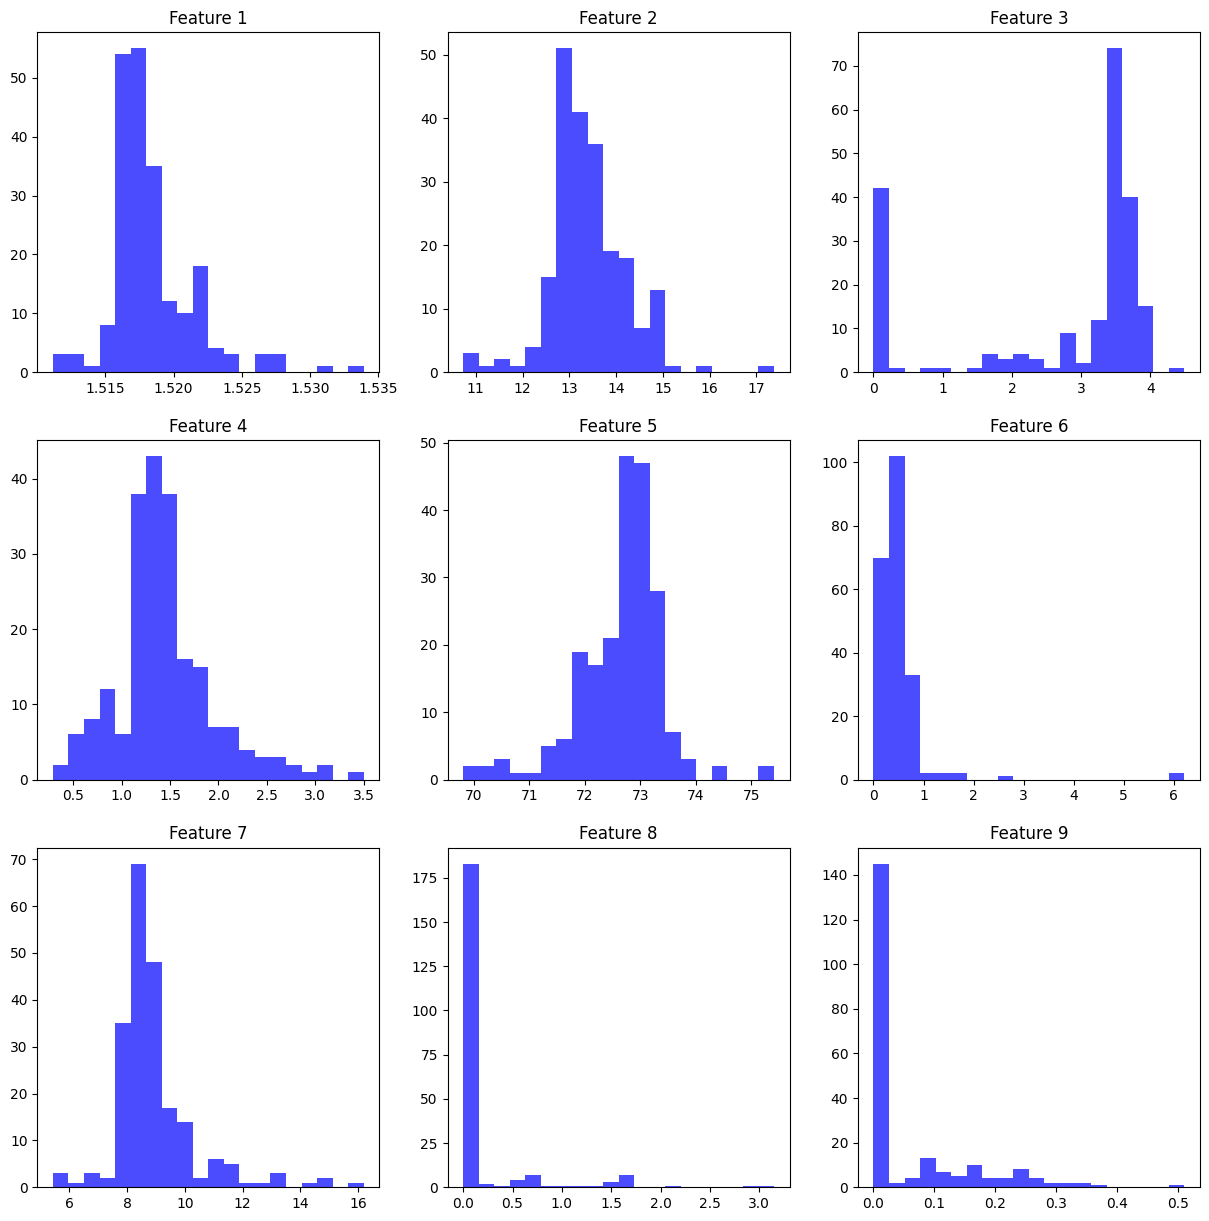

In [9]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
# Plotting the histogram for each feature
counter = 0
for i in range(3):
    for j in range(3):
        counter = counter + 1
        if counter > X.shape[1]: break
        axs[i, j].hist(X[:, counter-1], bins=20, color='blue', alpha=0.7)
        axs[i, j].set_title(f'Feature {counter}')
plt.show()

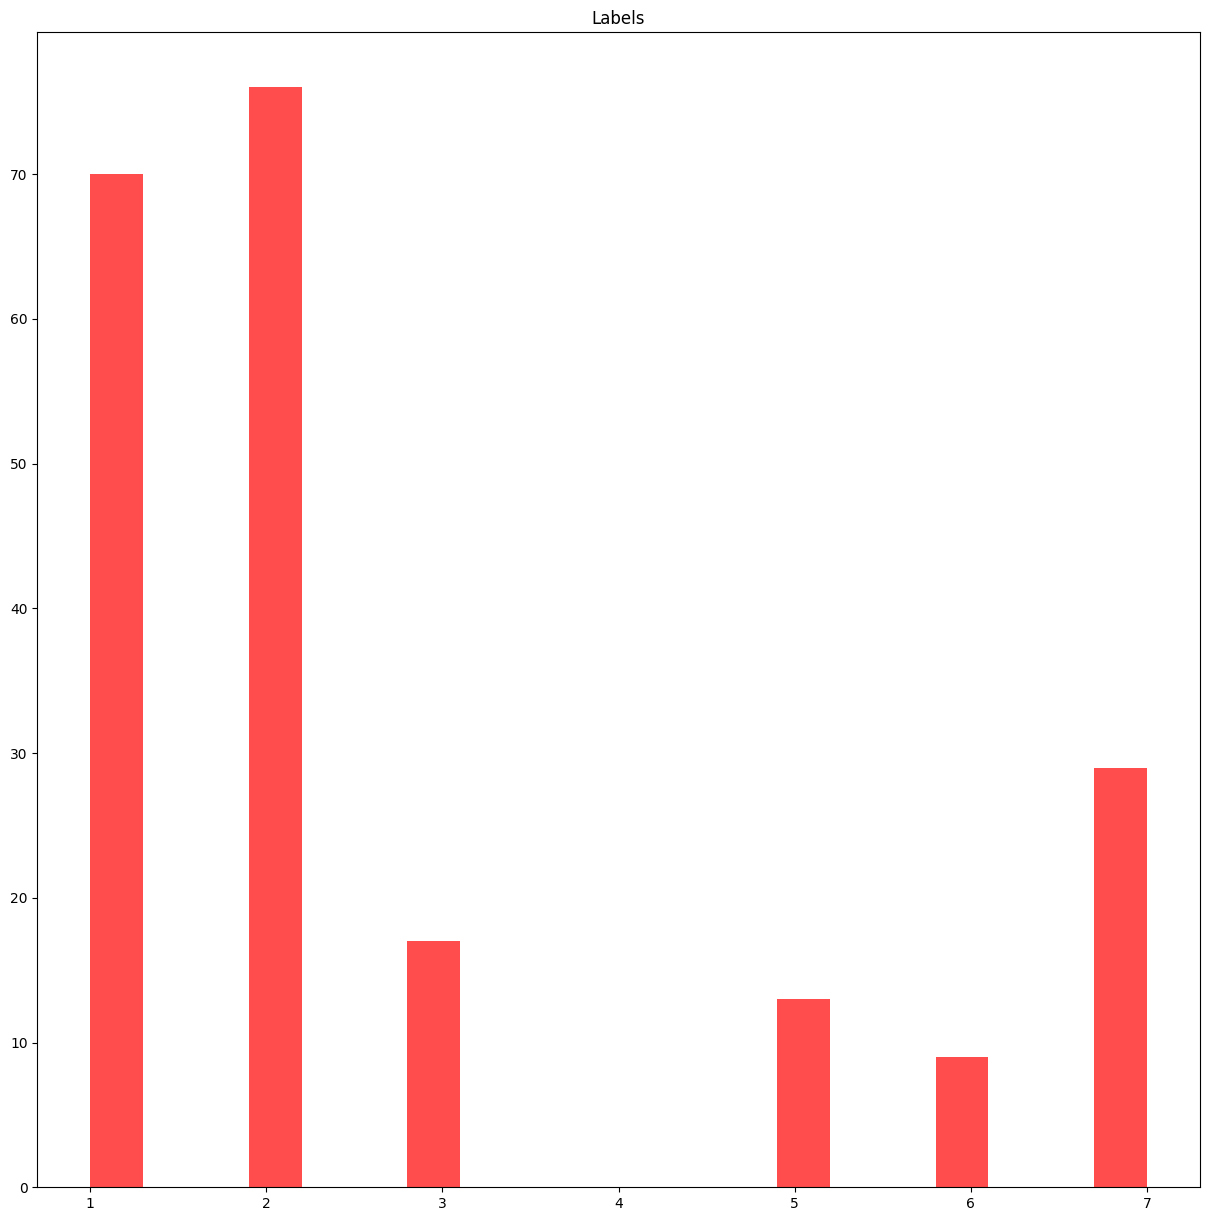

In [10]:
fig, axs = plt.subplots(1,1,figsize=(15, 15))
axs.hist(y, bins=20, color='red', alpha=0.7)
axs.set_title('Labels')
plt.show()

<Figure size 1200x1200 with 0 Axes>

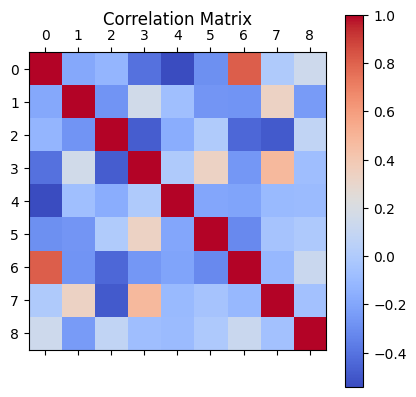

In [11]:
cor_matrix = np.corrcoef(X, rowvar=False)
# Plot the correlation matrix
plt.figure(figsize=(12, 12))
cax = plt.matshow(cor_matrix, cmap='coolwarm')
plt.colorbar(cax)
plt.title('Correlation Matrix', pad=20)
plt.show()

In [12]:
encoder = OneHotEncoder(sparse=False)
y_enc = encoder.fit_transform(y.reshape(-1, 1))
print(y_enc.shape)

(214, 6)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2,
random_state=42)

In [14]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
len(y_enc[0])

6

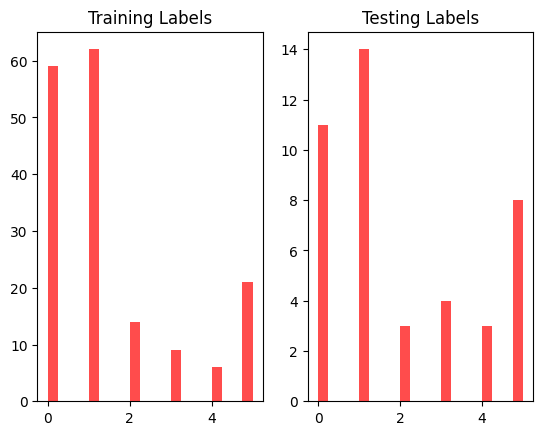

In [16]:
fig, axs = plt.subplots(1,2)
axs[0].hist(np.argmax(y_train, axis=1), bins=20, color='red', alpha=0.7)
axs[0].set_title('Training Labels')
axs[1].hist(np.argmax(y_test, axis=1), bins=20, color='red', alpha=0.7)
axs[1].set_title('Testing Labels')
plt.show()

In [17]:
# Build the neural network model
keras.backend.clear_session()
model = Sequential()
# Add layers to the model
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(len((y_enc[0])), activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                320       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 6)                 54        
                                                                 
Total params: 1,038
Trainable params: 1,038
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32,
validation_split=0.2)



Epoch 1/100
5/5 [==============================] - 1s 48ms/step - loss: 1.8532 - accuracy: 0.0735 - val_loss: 1.8346 - val_accuracy: 0.1429
Epoch 2/100
5/5 [==============================] - 0s 8ms/step - loss: 1.7968 - accuracy: 0.1176 - val_loss: 1.7968 - val_accuracy: 0.2000
Epoch 3/100
5/5 [==============================] - 0s 8ms/step - loss: 1.7532 - accuracy: 0.2059 - val_loss: 1.7633 - val_accuracy: 0.2000
Epoch 4/100
5/5 [==============================] - 0s 8ms/step - loss: 1.7116 - accuracy: 0.3382 - val_loss: 1.7365 - val_accuracy: 0.3143
Epoch 5/100
5/5 [==============================] - 0s 8ms/step - loss: 1.6769 - accuracy: 0.4338 - val_loss: 1.7113 - val_accuracy: 0.4000
Epoch 6/100
5/5 [==============================] - 0s 8ms/step - loss: 1.6438 - accuracy: 0.4559 - val_loss: 1.6904 - val_accuracy: 0.4286
Epoch 7/100
5/5 [==============================] - 0s 8ms/step - loss: 1.6145 - accuracy: 0.4926 - val_loss: 1.6691 - val_accuracy: 0.4000
Epoch 8/100
5/5 [=========

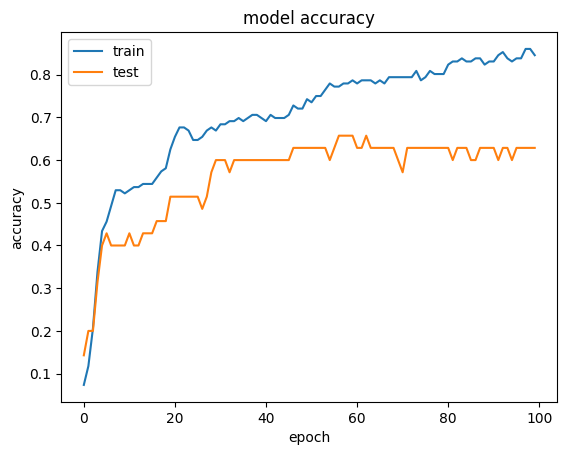

In [19]:
# Visualize Model Training History
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


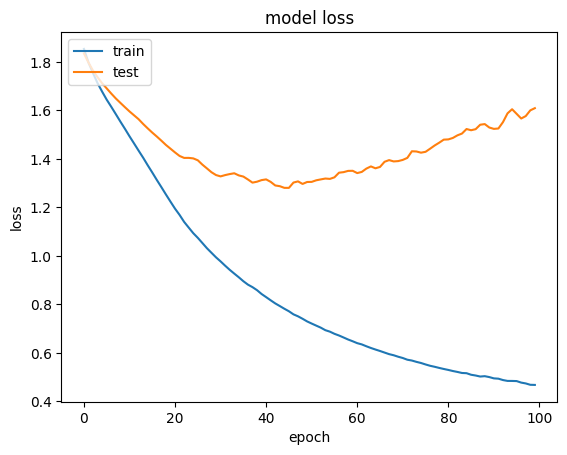

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
predictions = model.predict (X_test)
print(predictions.shape, y_test.shape)

2/2 [==============================] - 0s 2ms/step - loss: 33.8581 - accuracy: 0.2558
Test Loss: 33.85805130004883
Test Accuracy: 0.25581395626068115
2/2 [==============================] - 0s 1ms/step
(43, 6) (43, 6)


In [22]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))
print(cm)
cr = classification_report(np.argmax(y_test, axis=1), np.argmax(predictions,
axis=1))
print(cr)
#from keras.utils.vis_utils import plot_model
#plot_model(model, to_file='model_plot.png', show_shapes=True,
#show_layer_names=True)


[[11  0  0  0  0  0]
 [14  0  0  0  0  0]
 [ 3  0  0  0  0  0]
 [ 4  0  0  0  0  0]
 [ 3  0  0  0  0  0]
 [ 8  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.26      1.00      0.41        11
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         8

    accuracy                           0.26        43
   macro avg       0.04      0.17      0.07        43
weighted avg       0.07      0.26      0.10        43



C:\Users\schmi\anaconda3\envs\TF23\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\schmi\anaconda3\envs\TF23\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\schmi\anaconda3\envs\TF23\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Evaluation of Model 1
the 4 layer with 32-16-8-6 is heavily over fitting at 100 epochs. The random state has reasonably distributed the labels in both the training and test sets, but after about 30 epochs the accuracy and recall drop dramatically for the testing data but continue to improve on the training indicating overfitting.

The model will be adjusted to have fewer neurons and only 30 epochs

In [23]:
# Build the neural network model
keras.backend.clear_session()
model = Sequential()
# Add layers to the model
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(len((y_enc[0])), activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 6)                 54        
                                                                 
Total params: 422
Trainable params: 422
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=35, batch_size=32,
validation_split=0.2)

Epoch 1/35
5/5 [==============================] - 1s 42ms/step - loss: 1.7556 - accuracy: 0.0809 - val_loss: 1.7139 - val_accuracy: 0.2000
Epoch 2/35
5/5 [==============================] - 0s 8ms/step - loss: 1.7303 - accuracy: 0.1176 - val_loss: 1.6899 - val_accuracy: 0.2857
Epoch 3/35
5/5 [==============================] - 0s 8ms/step - loss: 1.7082 - accuracy: 0.1691 - val_loss: 1.6686 - val_accuracy: 0.2571
Epoch 4/35
5/5 [==============================] - 0s 7ms/step - loss: 1.6872 - accuracy: 0.2132 - val_loss: 1.6495 - val_accuracy: 0.3143
Epoch 5/35
5/5 [==============================] - 0s 8ms/step - loss: 1.6662 - accuracy: 0.3382 - val_loss: 1.6310 - val_accuracy: 0.4571
Epoch 6/35
5/5 [==============================] - 0s 8ms/step - loss: 1.6473 - accuracy: 0.3824 - val_loss: 1.6134 - val_accuracy: 0.4571
Epoch 7/35
5/5 [==============================] - 0s 7ms/step - loss: 1.6285 - accuracy: 0.4412 - val_loss: 1.5968 - val_accuracy: 0.4857
Epoch 8/35
5/5 [=================

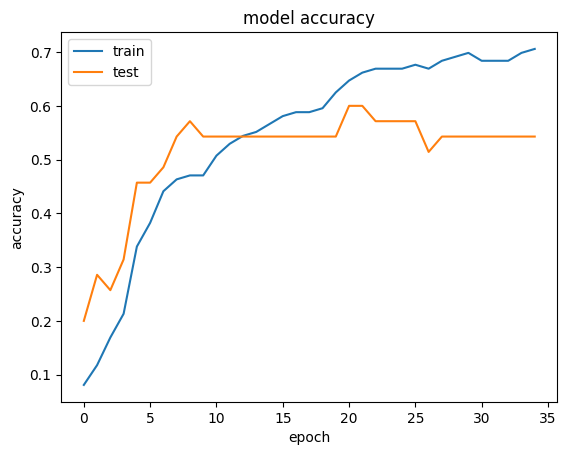

In [25]:
# Visualize Model Training History
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


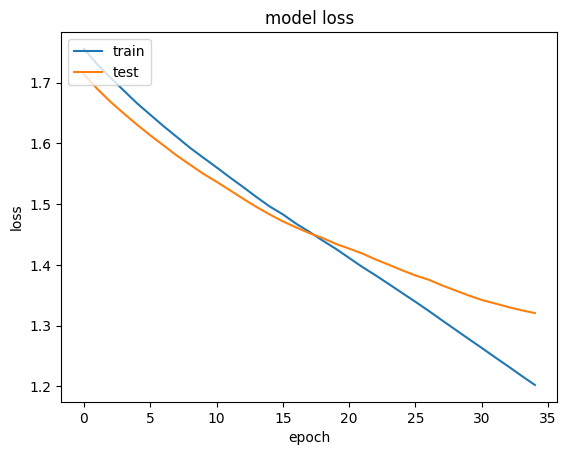

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
predictions = model.predict (X_test)
print(predictions.shape, y_test.shape)

2/2 [==============================] - 0s 3ms/step - loss: 17.1203 - accuracy: 0.2558
Test Loss: 17.120283126831055
Test Accuracy: 0.25581395626068115
2/2 [==============================] - 0s 2ms/step
(43, 6) (43, 6)


In [28]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))
print(cm)
cr = classification_report(np.argmax(y_test, axis=1), np.argmax(predictions,
axis=1))
print(cr)

[[11  0  0  0  0  0]
 [14  0  0  0  0  0]
 [ 3  0  0  0  0  0]
 [ 4  0  0  0  0  0]
 [ 3  0  0  0  0  0]
 [ 8  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.26      1.00      0.41        11
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         8

    accuracy                           0.26        43
   macro avg       0.04      0.17      0.07        43
weighted avg       0.07      0.26      0.10        43



C:\Users\schmi\anaconda3\envs\TF23\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\schmi\anaconda3\envs\TF23\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\schmi\anaconda3\envs\TF23\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# From combining lower epochs and more neurons, it seems that the model overfits to one label and refuses to attempt categorizing other options
a few more attempts have not yielded better results.

Changing the optimizer from Adam to SGD results in the model trying other labels, but the loss needs to remain categorical 

In [29]:
# Build the neural network model
keras.backend.clear_session()
model = Sequential()
# Add layers to the model
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len((y_enc[0])), activation='softmax'))
# Compile the model
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1280      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 6)                 198       
                                                                 
Total params: 11,814
Trainable params: 11,814
Non-trainable params: 0
_________________________________________________________________
None


In [30]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=35, batch_size=32,
validation_split=0.2)

Epoch 1/35
5/5 [==============================] - 0s 41ms/step - loss: 1.8887 - accuracy: 0.0588 - val_loss: 1.8859 - val_accuracy: 0.1143
Epoch 2/35
5/5 [==============================] - 0s 8ms/step - loss: 1.8536 - accuracy: 0.0662 - val_loss: 1.8549 - val_accuracy: 0.1429
Epoch 3/35
5/5 [==============================] - 0s 7ms/step - loss: 1.8196 - accuracy: 0.1618 - val_loss: 1.8246 - val_accuracy: 0.2000
Epoch 4/35
5/5 [==============================] - 0s 8ms/step - loss: 1.7881 - accuracy: 0.2353 - val_loss: 1.8016 - val_accuracy: 0.2857
Epoch 5/35
5/5 [==============================] - 0s 8ms/step - loss: 1.7637 - accuracy: 0.2574 - val_loss: 1.7803 - val_accuracy: 0.3429
Epoch 6/35
5/5 [==============================] - 0s 8ms/step - loss: 1.7394 - accuracy: 0.3382 - val_loss: 1.7584 - val_accuracy: 0.2857
Epoch 7/35
5/5 [==============================] - 0s 7ms/step - loss: 1.7160 - accuracy: 0.4265 - val_loss: 1.7432 - val_accuracy: 0.3143
Epoch 8/35
5/5 [=================

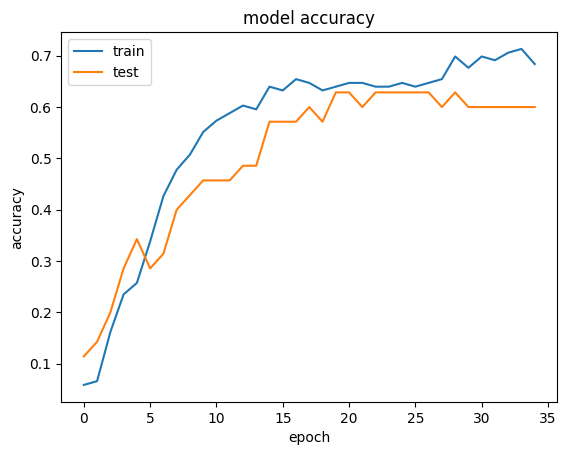

In [31]:
# Visualize Model Training History
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

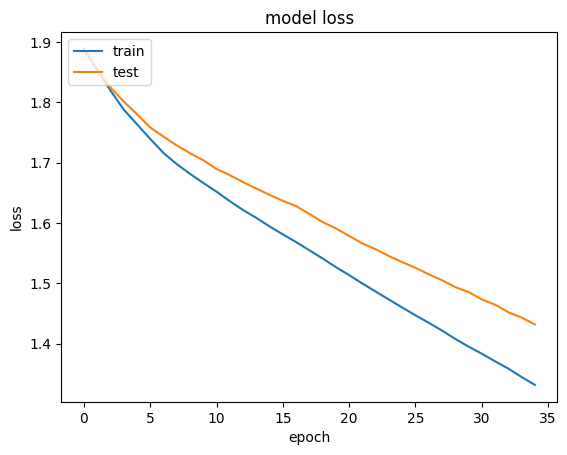

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
predictions = model.predict (X_test)
print(predictions.shape, y_test.shape)

2/2 [==============================] - 0s 2ms/step - loss: 8.1865 - accuracy: 0.1860
Test Loss: 8.186491012573242
Test Accuracy: 0.1860465109348297
2/2 [==============================] - 0s 2ms/step
(43, 6) (43, 6)


In [34]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))
print(cm)
cr = classification_report(np.argmax(y_test, axis=1), np.argmax(predictions,
axis=1))
print(cr)

[[ 0  0  0  0  0 11]
 [ 0  0  0  0  0 14]
 [ 0  0  0  0  0  3]
 [ 0  0  0  0  0  4]
 [ 0  0  0  0  0  3]
 [ 0  0  0  0  0  8]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3
           5       0.19      1.00      0.31         8

    accuracy                           0.19        43
   macro avg       0.03      0.17      0.05        43
weighted avg       0.03      0.19      0.06        43



C:\Users\schmi\anaconda3\envs\TF23\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\schmi\anaconda3\envs\TF23\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\schmi\anaconda3\envs\TF23\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
